In [1]:
from aqua.util import load_yaml, get_arg, create_folder, dump_yaml

In [2]:
import pandas as pd
from pandas import json_normalize
import glob

In [3]:
machines = ["lumi", "mn4"]
ensembles = ["p000", "p001", "p002", "p003"]

consolidated_df = pd.DataFrame()
data= {}
for machine in machines:
    data_ensembles= {}
    for ensemble in ensembles:
        pattern = f"/gpfs/scratch/dese28/dese28422/ecmean_files/YAML/*{machine}*/*{ensemble}*yml"
        yaml_files = glob.glob(pattern)
        loaded_yaml= load_yaml(yaml_files[0])
        data_ensembles[ensemble] = loaded_yaml
        # print(pattern)
    data[machine] = data_ensembles
    

In [4]:
data["lumi"]["p000"]["ua"]

{'ALL': {'Global': 4.042, 'North Midlat': 1.902, 'Tropical': 4.494, 'South Midlat': 5.279}, 'DJF': {'Global': 2.591, 'North Midlat': 0.427, 'Tropical': 3.103, 'South Midlat': 3.731}, 'JJA': {'Global': 9.001, 'North Midlat': 4.179, 'Tropical': 15.234, 'South Midlat': 1.355}}

In [5]:
machines = []
ensembles = []
variables = []
seasons = []
regions = []
values = []

for machine in data:
    for ensemble in data[machine]:
        for variable in data[machine][ensemble]:
            for season in data[machine][ensemble][variable]:
                for region in data[machine][ensemble][variable][season]:
                    # for va in data[machine][ensemble][variable][season]:
                    # if variable == "ua":
                        machines.append(machine)
                        ensembles.append(ensemble)
                        variables.append(variable)
                        seasons.append(season)
                        regions.append(region)
                        value = data[machine][ensemble][variable][season][region]
                        values.append( value )
                    # print(machine, ensemble, variable, season, region)
                    # if variable == "tas":
                    #     print(machine, variable, value)
                    

# Create a DataFrame
df = pd.DataFrame({'machines': machines, 'ensembles': ensembles, 'variables': variables, 'seasons': seasons, 'locations': regions, 'pi_score': values})
# df

In [6]:
df.variables.unique()

array(['psl', 'tas', 'pr', 'ta', 'ua', 'va', 'hus', 'sos'], dtype=object)

In [7]:
df

,machines,ensembles,variables,seasons,locations,pi_score
0,lumi,p000,psl,ALL,Global,2.490
1,lumi,p000,psl,ALL,North Midlat,1.722
2,lumi,p000,psl,ALL,Tropical,3.019
3,lumi,p000,psl,ALL,South Midlat,2.199
4,lumi,p000,psl,DJF,Global,1.126
...,...,...,...,...,...,...
763,mn4,p003,sos,DJF,South Midlat,2.839
764,mn4,p003,sos,JJA,Global,6.797
765,mn4,p003,sos,JJA,North Midlat,17.314
766,mn4,p003,sos,JJA,Tropical,4.447


In [8]:
df[df["variables"]=="ua"].head(20)

,machines,ensembles,variables,seasons,locations,pi_score
48,lumi,p000,ua,ALL,Global,4.042
49,lumi,p000,ua,ALL,North Midlat,1.902
50,lumi,p000,ua,ALL,Tropical,4.494
51,lumi,p000,ua,ALL,South Midlat,5.279
52,lumi,p000,ua,DJF,Global,2.591
53,lumi,p000,ua,DJF,North Midlat,0.427
54,lumi,p000,ua,DJF,Tropical,3.103
55,lumi,p000,ua,DJF,South Midlat,3.731
56,lumi,p000,ua,JJA,Global,9.001
57,lumi,p000,ua,JJA,North Midlat,4.179


In [9]:
consolidated_df.to_csv("pi_scores.csv", index=False)

In [38]:
df.variables.unique()

array(['psl', 'tas', 'ta', 'ua', 'va', 'hus'], dtype=object)

In [35]:
# df[df["variables"]== "ta"].value.isna().any().any()
# df[df["variables"]== "tos"]
df = df[df['variables'] != "sos"]
df = df[df['variables'] != "pr"]

df = df[df['variables'] != "siconc"]

In [12]:
from scipy.stats import kstest
from scipy.stats import ks_2samp


In [48]:
vars = []
seasons = []
regions = []
p_values = []
KS_score = {}

for variable in df.variables.unique():
    # if variable == "pr":
        for season in df.seasons.unique():
            # if season == "ALL":
                for location in df.locations.unique():
                    # if location == "Tropical" :
                        filtered_df= df[(df["variables"] == variable) & (df["seasons"] == season) & (df["locations"]== location)]
                        machine1= filtered_df[(filtered_df["machines"]==df.machines.unique()[0])]
                        machine2= filtered_df[(filtered_df["machines"]==df.machines.unique()[1])]
                        vars.append(variable)
                        seasons.append(season+"_"+location)
                        regions.append(location)
                        
                        ks_score, pvalue = ks_2samp(machine1.pi_score.values, machine2.pi_score.values) 
                        p_values.append(pvalue)
                    # KS_score = 
                # print(ks_2samp)
            

# filter= df[(df["variable"] == "psl") & (df["season"] == "ALL") & (df["location"]== "Global")]
# mn4= df[df["variables"]== "mn4"]
# lumi= filter[filter["machine"]== "lumi"]
# ks_2samp(lumi.Value.values, mn4.Value.values)

In [14]:
import numpy as np
msl_mn4 = np.array([0.26,0.25,0.27,0.28])
msl_lumi = np.array([0.25,0.24,0.24,0.24])
ks_2samp(msl_mn4, msl_lumi)


KstestResult(statistic=0.75, pvalue=0.22857142857142862, statistic_location=0.25, statistic_sign=-1)

In [43]:
print(machine1)
print(machine2)

    machines ensembles variables seasons locations  pi_score
74      lumi      p000       hus     ALL  Tropical     2.777
170     lumi      p001       hus     ALL  Tropical     2.977
266     lumi      p002       hus     ALL  Tropical     3.016
362     lumi      p003       hus     ALL  Tropical     3.031
    machines ensembles variables seasons locations  pi_score
458      mn4      p000       hus     ALL  Tropical     3.625
554      mn4      p001       hus     ALL  Tropical     3.619
650      mn4      p002       hus     ALL  Tropical     3.283
746      mn4      p003       hus     ALL  Tropical     3.650


In [44]:
ks_2samp(machine1.pi_score.values, machine2.pi_score.values)

KstestResult(statistic=1.0, pvalue=0.028571428571428577, statistic_location=3.031, statistic_sign=1)

In [46]:
df_new.variable.unique()

array(['psl', 'tas', 'ta', 'ua', 'va', 'hus'], dtype=object)

In [49]:
data = {'variable': vars, "season": seasons,  'p_value': p_values}
df_new = pd.DataFrame(data)
df_new

,variable,season,p_value
0,psl,ALL_Global,0.228571
1,psl,ALL_North Midlat,0.771429
2,psl,ALL_Tropical,0.028571
3,psl,ALL_South Midlat,0.771429
4,psl,DJF_Global,0.028571
...,...,...,...
67,hus,DJF_South Midlat,0.228571
68,hus,JJA_Global,0.028571
69,hus,JJA_North Midlat,0.028571
70,hus,JJA_Tropical,0.028571


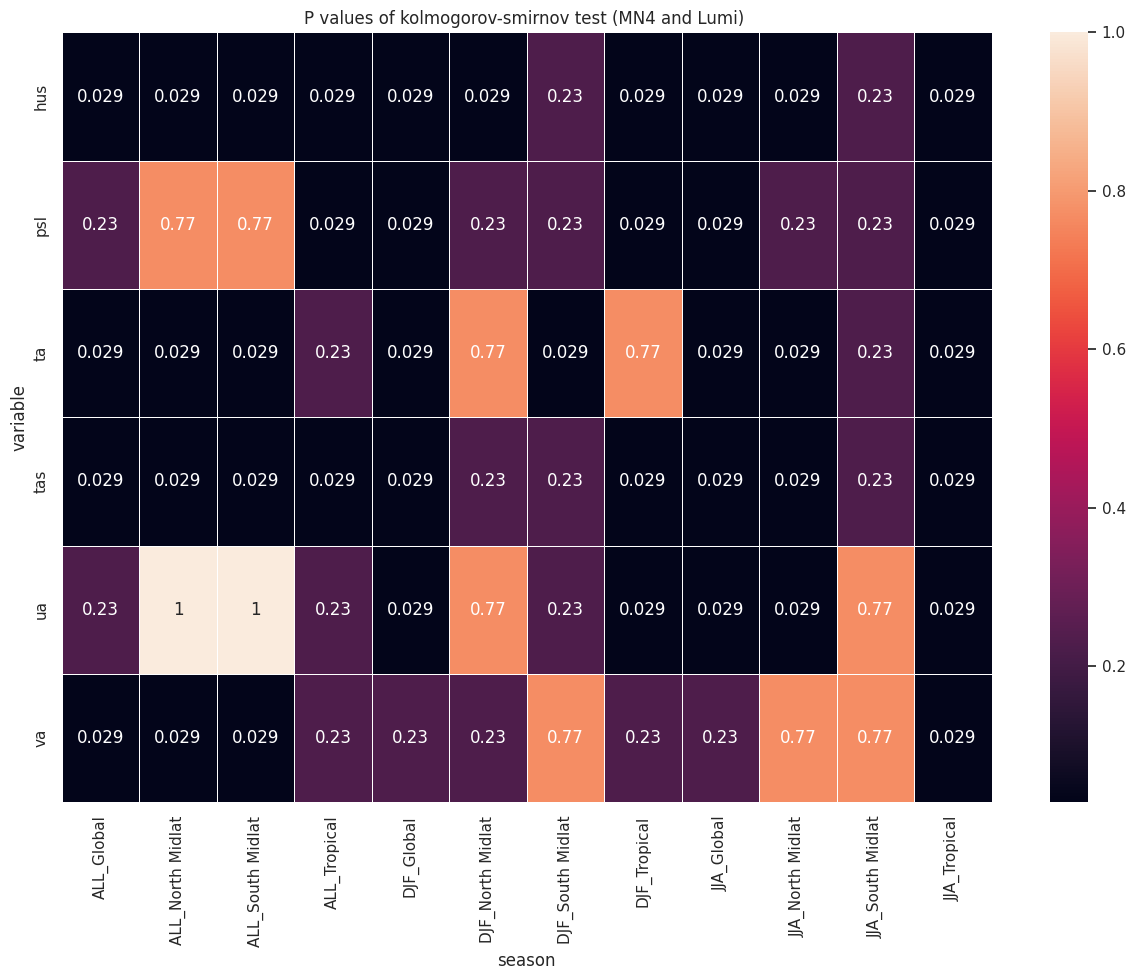

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
# df_new = df_new.drop_duplicates(subset=['variable', 'season'])
flights = df_new.pivot_table(index="variable", columns="season", values="p_value", aggfunc='mean')

# flights = df_new.pivot(index= "variable", columns= "season",values= "p_value")
fig, ax = plt.subplots(figsize=(15,10)) 
# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, linewidths=.5)
plt.title("P values of kolmogorov-smirnov test (MN4 and Lumi) ")
# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(glue)
plt.savefig("/gpfs/scratch/dese28/dese28422/ecmean_files/figs/mn4_lumi_KS_test_p_value.png", bbox_inches='tight')

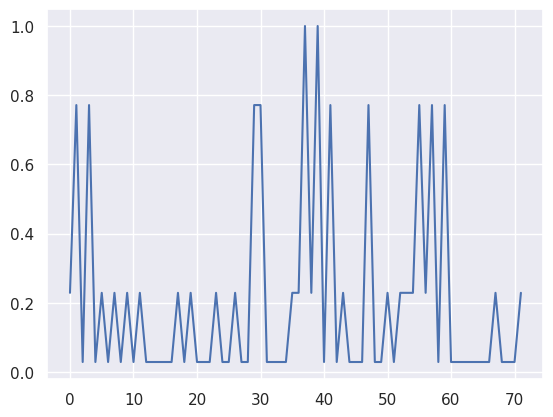

In [51]:
plt.plot(p_values)
# p_values

In [22]:
nested_dict = {}

for _, row in df_new.iterrows():
    variable = row['variable']
    season = row['season']
    region = row['region']
    p_value = row['p_value']

    if variable not in nested_dict:
        nested_dict[variable] = {}

    if season not in nested_dict[variable]:
        nested_dict[variable][season] = {}

    nested_dict[variable][season][region] = p_value

nested_dict

KeyError: 'region'

In [30]:
dump_yaml("/gpfs/scratch/dese28/dese28422/ecmean_files/YAML/mn4_lumi_KS_test_p_value.yml", nested_dict)